# Лабораторная 1. Упражнение 1
## Импорты

In [306]:
from math import pi

from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


simulator = AerSimulator()

## Задание 2
Соберите схему, состоящую из 2 кубитов. Установите для одного кубита состояние |0>, а для второго - состояние |1>. 
Добавьте операцию измерения для обоих кубитов и выполните получившуюся схему в режиме симуляции

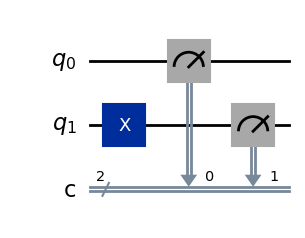

In [307]:
qc = QuantumCircuit(2, 2)

qc.x(1)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('mpl')

In [308]:
print("Результаты: ", end='')
simulator.run(qc).result().get_counts(qc)

Результаты: 

{'10': 1024}

## Задание 3
Создайте схему, состоящую из одного кубита. Приведите кубит в состояние суперпозиции (1/sqrt(2))(|0> + |1>).
Примените измеритель к кубиту. Для полученной схемы запустите симуляцию с числом выполнений 1, 2, 8, 32, 64, 128, 512, 1024, 8192. 
Сделайте выводы на основе получившихся результатов.
> Вывод: 
> При малом числе выполнений результаты могут сильно отклоняться от теоретического ожидания (50/50), поскольку значений слишком мало.
> С увеличением числа выполнений, результаты становятся более стабильными и близкими к теоретическому равному распределению вероятностей.
> При большем количестве выполнений мы видим подтверждение правильности работы гейта Адамара и его создания суперпозиции.

In [309]:
qc = QuantumCircuit(1, 1)

qc.h(0)
qc.measure(0, 0)

for shots in [1, 2, 8, 32, 64, 128, 512, 1024, 8192]:
    print("{} выполнений => {}".format(
        shots,
        simulator.run(qc, shots=shots).result().get_counts(qc)
    ))

1 выполнений => {'0': 1}
2 выполнений => {'0': 1, '1': 1}
8 выполнений => {'1': 4, '0': 4}
32 выполнений => {'1': 21, '0': 11}
64 выполнений => {'0': 31, '1': 33}
128 выполнений => {'0': 64, '1': 64}
512 выполнений => {'1': 258, '0': 254}
1024 выполнений => {'0': 533, '1': 491}
8192 выполнений => {'0': 4162, '1': 4030}


## Задание 4
Соберите квантовые схемы, показанные на рис. а и б

### a)
![а](pic/task1-1-a.png "a")

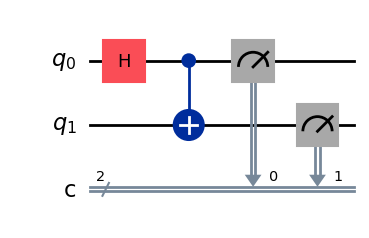

In [310]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('mpl')

### b)
![b](pic/task1-1-2.png "b")

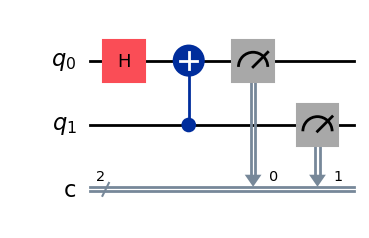

In [311]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(1, 0)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('mpl')

## Задание 5

Создайте схемы представленные на рис. а и б.

Запустите 512 симуляций данных схем. Сделайте выводы на основе получившихся результатов.
> Распределение состояний кубитов близко к равномерному. Это ожидаемо, т.к. в схеме есть операции, приводящие кубиты в состояние суперпозиции.

### a)
![a](pic/task1-2-1.png)

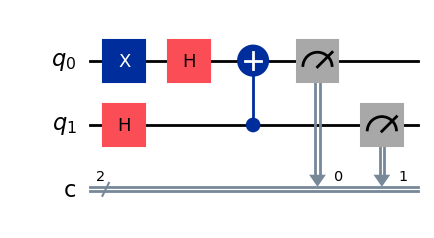

In [312]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.h(1)
qc.h(0)
qc.cx(1, 0)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('mpl')

In [313]:
print("Результаты:")
simulator.run(qc, shots=512).result().get_counts(qc)

Результаты:


{'10': 124, '11': 148, '01': 118, '00': 122}

### b)
![b](pic/task1-2-2.png)
> Дополнение к выводу: здесь мы измерили лишь один кубит, про второй мы не знаем, а значит распределение равномерное между двумя значениями - 0 и 1.

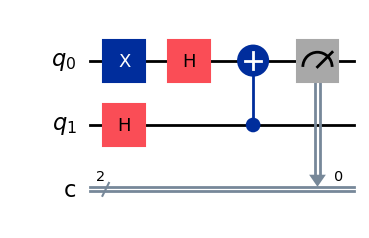

In [314]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.h(1)
qc.h(0)
qc.cx(1, 0)
qc.measure(0, 0)

qc.draw("mpl")

In [315]:
print("Результаты:")
simulator.run(qc, shots=512).result().get_counts(qc)

Результаты:


{'00': 266, '01': 246}

## Задание 6
Создайте схемы. Выполните симуляцию данных схем с числом измерений - 1024. Проанализируйте результаты симуляции и положение векторов на Q-сфере. Сделайте выводы.

In [316]:
def run(qc: QuantumCircuit):
    print(f"Результаты: {simulator.run(qc, shots=1024).result().get_counts(qc)}")
    
def draw(qc: QuantumCircuit, sv: Statevector):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    qc.draw(output='mpl', ax=axes[0])
    canvas = FigureCanvasAgg(plot_bloch_multivector(sv))
    canvas.draw()
    axes[1].imshow(canvas.buffer_rgba())
    axes[1].axis('off')
    plt.show()

### a)

![a](pic/task1-3-a.png)

Результаты: {'0': 1024}


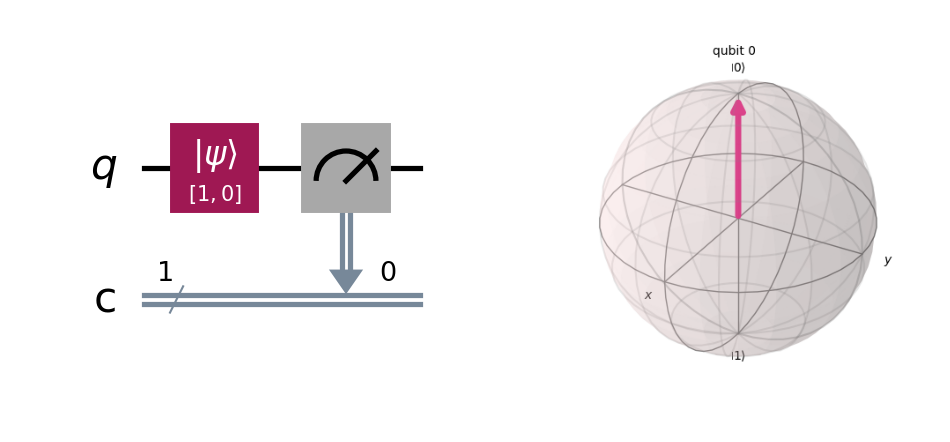

In [317]:
qc = QuantumCircuit(1, 1)
qc.initialize([1, 0], 0)
state = Statevector.from_instruction(qc)
qc.measure(0, 0)
run(qc)
draw(qc, state)

### b)

![b](pic/task1-3-b.png)

Результаты: {'1': 1024}


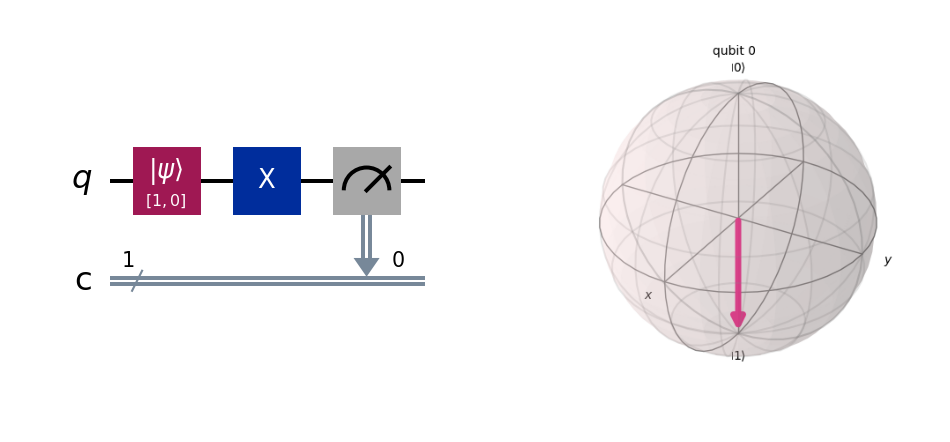

In [318]:
qc = QuantumCircuit(1, 1)
qc.initialize([1, 0], 0)
qc.x(0)
state = Statevector.from_instruction(qc)
qc.measure(0, 0)
run(qc)
draw(qc, state)

### c)

![c](pic/task1-3-c.png)

Результаты: {'0': 488, '1': 536}


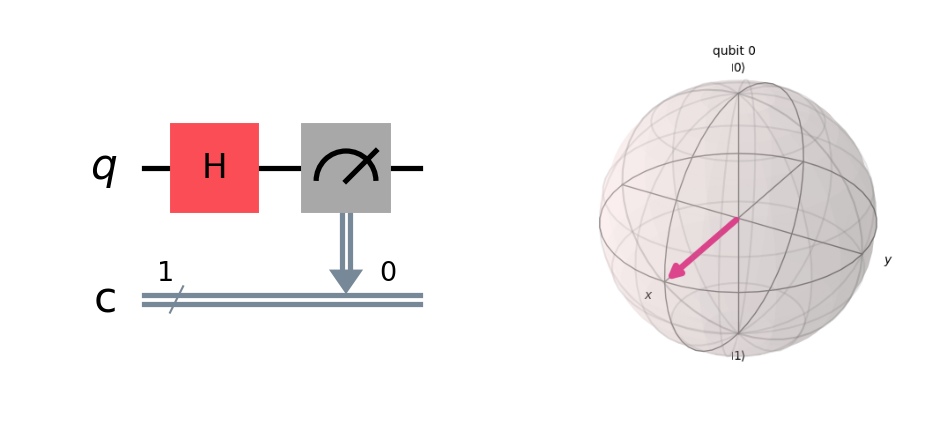

In [319]:
qc = QuantumCircuit(1, 1)
qc.h(0)
state = Statevector.from_instruction(qc)
qc.measure(0, 0)
run(qc)
draw(qc, state)

### d)

![d](pic/task1-3-d.png)

Результаты: {'0': 510, '1': 514}


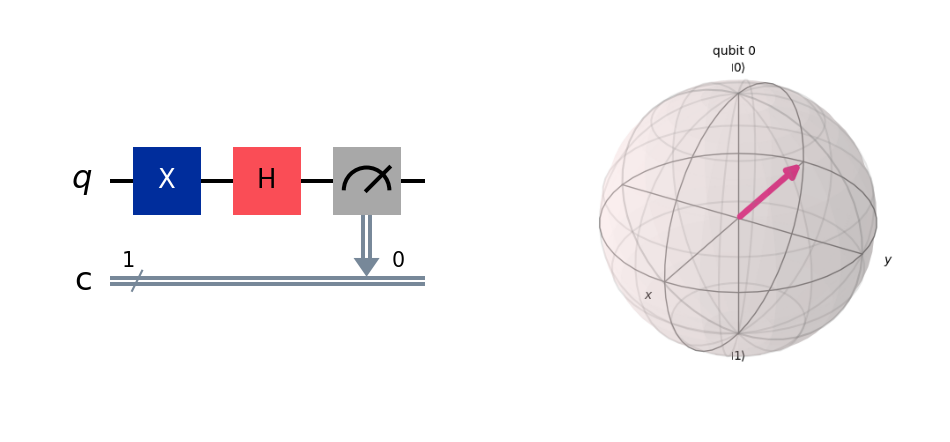

In [320]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
state = Statevector.from_instruction(qc)
qc.measure(0, 0)
run(qc)
draw(qc, state)

### e)

![e](pic/task1-3-e.png)

Результаты: {'1': 257, '0': 767}


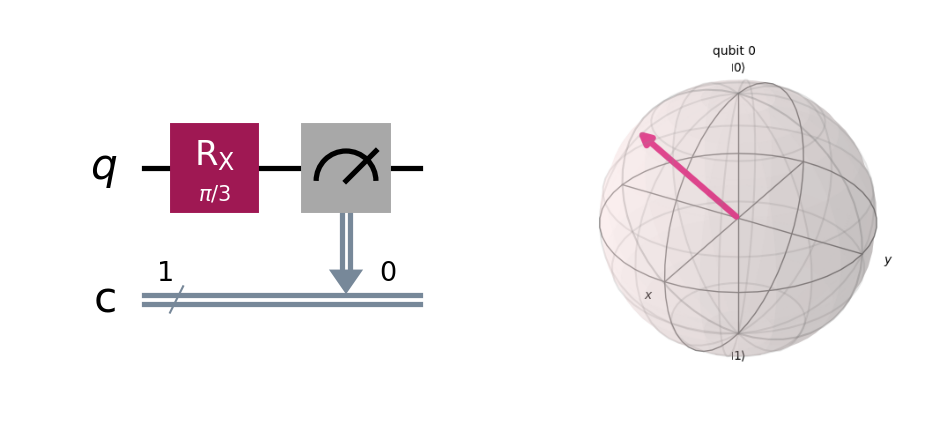

In [321]:
qc = QuantumCircuit(1, 1)
qc.rx(pi / 3, 0)
state = Statevector.from_instruction(qc)
qc.measure(0, 0)
run(qc)
draw(qc, state)

### f)

![f](pic/task1-3-f.png)

Результаты: {'1': 762, '0': 262}


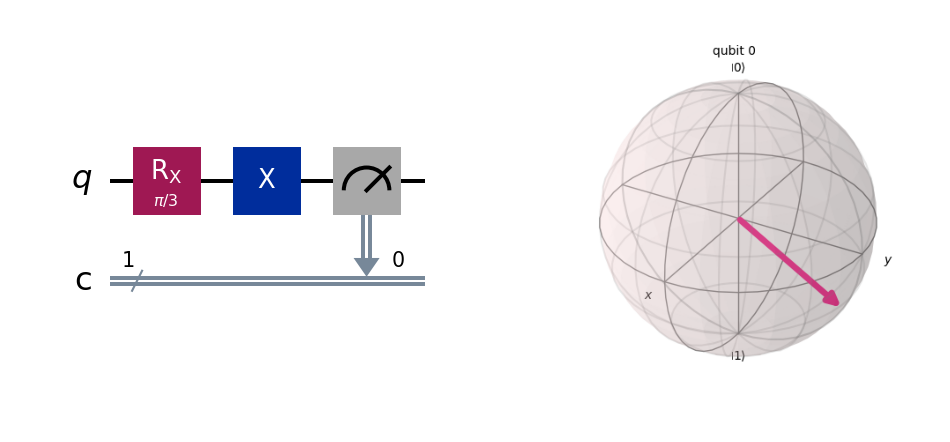

In [322]:
qc = QuantumCircuit(1, 1)
qc.rx(pi / 3, 0)
qc.x(0)
state = Statevector.from_instruction(qc)
qc.measure(0, 0)
run(qc)
draw(qc, state)